In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("./../data/5pic_a/1.JPG")
image = cv2.resize(image, (1008,756))
cv2.imwrite("./../page_images/5pic_a/1.JPG", image)

True

In [166]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Try to get SIFT points from image

In [167]:
image1 = cv2.imread("./data/library2.JPG")
image2 = cv2.imread("./data/library1.JPG")
image1 = cv2.resize(image1, (1008, 756))
image2 = cv2.resize(image2, (1008, 756))
cv2.imshow("part1", image1)
cv2.imshow("part2", image2)
cv2.waitKey(0)

-1

In [168]:
num_features = 2000

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
features1 = cv2.xfeatures2d.SIFT_create(num_features)
keypoints1, descriptors1 = features1.detectAndCompute(gray1, None)

gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
features2 = cv2.xfeatures2d.SIFT_create(num_features)
keypoints2, descriptors2 = features1.detectAndCompute(gray2, None)

In [169]:
keypoints1[:5]

(< cv2.KeyPoint 00000260BA670060>,
 < cv2.KeyPoint 00000260B2B12330>,
 < cv2.KeyPoint 00000260B2B12540>,
 < cv2.KeyPoint 00000260B2B122D0>,
 < cv2.KeyPoint 00000260B2B12720>)

In [170]:
keypoints_list1 = [point.pt for point in keypoints1]
keypoints_list2 = [point.pt for point in keypoints2]
keypoints_list1[:5]

[(351.21240234375, 601.3240356445312),
 (871.67041015625, 467.0577087402344),
 (1001.5905151367188, 271.8350830078125),
 (871.67041015625, 467.0577087402344),
 (1001.36181640625, 297.82012939453125)]

In [171]:
descriptors1[:5]

array([[  2.,  50.,  89.,  58.,  11.,   3.,   0.,   0.,  29., 135.,  57.,
         33.,  21.,   7.,   2.,   0.,  29.,  27.,  34.,  46.,  33.,  16.,
          5.,   9.,  19.,  14.,  45.,  66.,  51.,   1.,   0.,   1.,  40.,
         21.,  72.,  58.,  26.,   5.,   0.,   1., 135.,  65.,  14.,   7.,
         17.,   7.,   1.,  29.,  29.,   6.,  35.,  56., 135.,  38.,   5.,
         10.,   1.,   2., 106.,  88.,  33.,  36.,   5.,   0.,  70.,   7.,
          3.,  29.,  38.,   3.,   0.,   1., 135.,  29.,   2.,  21.,  22.,
          2.,   1.,  14.,  26.,  25.,  16.,  96., 125.,  26.,   8.,   4.,
          4.,  16.,  19.,  27.,  66.,  86.,  16.,   2.,  52.,   1.,   1.,
          6.,   7.,  30.,  17.,  20., 135.,   8.,   3.,  18.,  38.,   9.,
          1.,  73.,  10.,  13.,  24.,  70., 135.,  11.,   1.,   6.,   1.,
         13.,  54.,  46.,  24.,   2.,   0.,   0.],
       [ 18.,  13.,   1.,   1.,   7.,   5.,   5.,   4.,  27.,   7.,   0.,
          0.,   9.,  61.,  19.,  21.,   2.,   0.,   0.,   0.,

Try to find matched features

In [172]:
example = np.linalg.norm(descriptors1[0] - descriptors2, axis=1)
example

array([429.44266, 580.2758 , 512.0967 , ..., 452.93155, 470.89807,
       518.38403], dtype=float32)

In [173]:
example.shape

(2000,)

In [174]:
sorted_features = np.sort(example, axis=0)
sorted_features

array([292.3012 , 320.48868, 325.02768, ..., 654.8435 , 659.5317 ,
       659.6484 ], dtype=float32)

In [258]:
match_pairs = []
threshold = 0.6

for i in range(len(keypoints_list1)):
    likeness = np.linalg.norm(descriptors1[i] - descriptors2, axis=1)
    likeness_sorted_index = np.argsort(likeness)
    
    most_like_feature, next_like_feature \
        = likeness[likeness_sorted_index[0]], likeness[likeness_sorted_index[1]]
        
    if (most_like_feature / next_like_feature) < threshold:
        point1 = keypoints_list1[i]
        point2 = keypoints_list2[likeness_sorted_index[0]]
        point_pair = [point1[0], point1[1], point2[0], point2[1]]
        match_pairs.append(point_pair)
        
match_pairs

[[927.59521484375, 377.8296813964844, 869.2639770507812, 389.95855712890625],
 [236.96615600585938, 391.895263671875, 509.0782775878906, 404.5412292480469],
 [236.96615600585938, 391.895263671875, 509.0782775878906, 404.5412292480469],
 [252.23167419433594, 403.0312805175781, 521.096435546875, 415.3060607910156],
 [264.8697509765625, 384.2337951660156, 532.0995483398438, 397.233642578125],
 [332.0210266113281, 614.2677612304688, 609.1267700195312, 621.2401123046875],
 [335.5934753417969, 349.0709228515625, 594.02490234375, 362.2270202636719],
 [337.5362243652344, 635.5549926757812, 614.6968383789062, 643.0470581054688],
 [340.3348388671875, 707.1051025390625, 621.2930908203125, 713.8545532226562],
 [344.0675048828125, 334.3700256347656, 602.6432495117188, 346.3988952636719],
 [350.1711730957031, 611.7605590820312, 626.5010986328125, 620.719482421875],
 [350.1711730957031, 611.7605590820312, 626.5010986328125, 620.719482421875],
 [354.4596252441406, 602.8992309570312, 631.1107788085938,

In [176]:
len(match_pairs)

163

Try to show both left and right images

In [177]:
image = np.hstack((image1, image2))

height, width, _ = image1.shape

for point1,point2 in match_pairs:
    x1,y1 = point1
    x2,y2 = point2
    
    # same as situation in get_points
    # we concat two images in width
    # so x2 in image should be x2 in image2 + width
    
    x2 += width
    
    x1,y1,x2,y2 = round(x1),round(y1),round(x2),round(y2)
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
    
    cv2.circle(image, (x1, y1), radius=3, color=[255,0,0],
                thickness=2, lineType=cv2.LINE_AA)

    cv2.circle(image, (x2, y2), radius=3, color=[255,0,0],
                thickness=2, lineType=cv2.LINE_AA)

    cv2.line(image, (x1, y1), (x2, y2), color=[255,255,0],
                thickness=1)
    
#cv2.imshow("sift_features", image)
#cv2.waitKey(0)

cv2.imwrite("./results/sift.jpg", image)
    
    

True

In [284]:
from homo_helper import *

In [273]:
inputs = []
outputs = []

for pair in match_pairs:
    inputs.append([pair[0],pair[1]])
    outputs.append([pair[2],pair[3]])
        
h = solve_homograpy(inputs, outputs)

In [274]:
h

array([[-1.01926732e-01, -2.28369553e-01,  2.98093088e+02],
       [-2.97480956e-01,  3.15548186e-02,  3.18911487e+02],
       [-7.07611963e-04, -4.62965543e-04,  1.00000000e+00]])

In [275]:
inputs[:5]

[[927.59521484375, 377.8296813964844],
 [236.96615600585938, 391.895263671875],
 [236.96615600585938, 391.895263671875],
 [252.23167419433594, 403.0312805175781],
 [264.8697509765625, 384.2337951660156]]

In [276]:
outputs[:5]

[[869.2639770507812, 389.95855712890625],
 [509.0782775878906, 404.5412292480469],
 [509.0782775878906, 404.5412292480469],
 [521.096435546875, 415.3060607910156],
 [532.0995483398438, 397.233642578125]]

Try to wrap the image1 using h

In [181]:
print(image2.shape[0:2])

if isinstance(inputs, list):
    inputs = np.array(inputs)
if isinstance(outputs, list):
    outputs = np.array(outputs)
    
inputs = inputs.astype(np.int64)
outputs = outputs.astype(np.int64)
    
mask1 = np.zeros(image1.shape[0:2], dtype=np.uint8)
mask2 = np.zeros(image2.shape[0:2], dtype=np.uint8)
cv2.fillConvexPoly(mask1, inputs, 255)
cv2.fillConvexPoly(mask2, outputs, 255)
np.set_printoptions(threshold=1000)

(756, 1008)


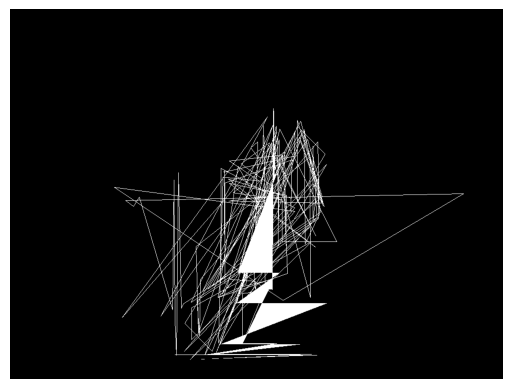

In [182]:
import matplotlib.pyplot as plt

plt.imshow(mask1, cmap='gray')
plt.axis('off')  
plt.show()

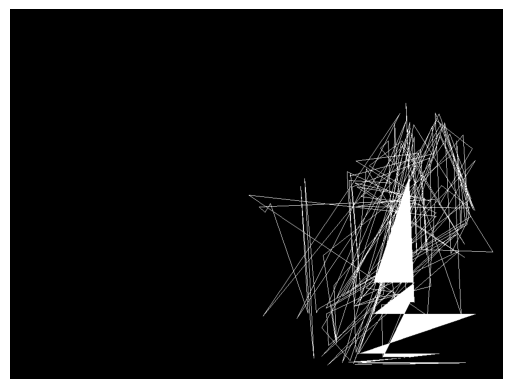

In [183]:
plt.imshow(mask2, cmap='gray')
plt.axis('off')  
plt.show()

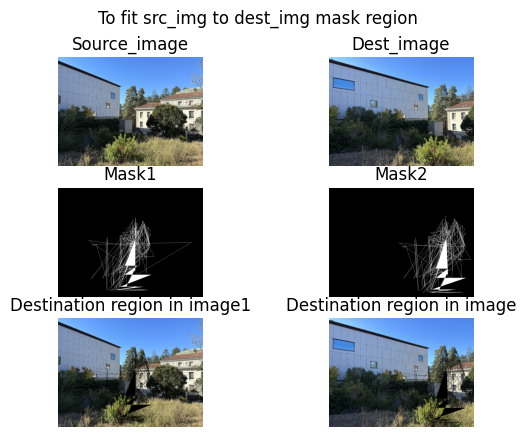

In [184]:
img_src = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
img_dst = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure()
plt.suptitle("To fit src_img to dest_img mask region")

plt.subplot(3, 2, 1)
plt.title("Source_image")
plt.imshow(img_src)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Dest_image")
plt.imshow(img_dst)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(mask1, cmap='gray', vmin=0, vmax=255)
plt.title("Mask1")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(mask2, cmap='gray', vmin=0, vmax=255)
plt.title("Mask2")
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(cv2.bitwise_and(img_src, img_src, mask=~mask1))
plt.title("Destination region in image1")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(cv2.bitwise_and(img_dst, img_dst, mask=~mask2))
plt.title("Destination region in image")
plt.axis('off')

plt.savefig("results/mask.jpg")

plt.show()

In [185]:
y, x = np.where(mask2)

In [186]:
y

array([192, 193, 194, ..., 726, 726, 727], dtype=int64)

In [187]:
x

array([809, 809, 809, ..., 738, 739, 649], dtype=int64)

In [188]:
pts_in_target = np.concatenate((x[:,np.newaxis], y[:, np.newaxis], np.ones((x.size, 1))), axis=1)

In [189]:
out_src = np.matmul(h, pts_in_target.T)
out_src.shape
# out_src[i] = (wx', wy', w)

(3, 39861)

In [190]:
# compute (x', y', 1)
out_src = out_src / out_src[-1, :]
out_src = out_src[:2, :]
out_src

array([[507.26744415, 507.28659848, 507.30580532, ..., 402.87365506,
        404.17295401, 322.83631471],
       [248.95109082, 249.38519822, 249.82049579, ..., 863.13170655,
        865.35416272, 728.68972381]])

In [191]:
out_src = out_src.T
out_src

array([[507.26744415, 248.95109082],
       [507.28659848, 249.38519822],
       [507.30580532, 249.82049579],
       ...,
       [402.87365506, 863.13170655],
       [404.17295401, 865.35416272],
       [322.83631471, 728.68972381]])

In [192]:
pts = pts_in_target[:, 0:2].astype(np.int64)
pts

array([[809, 192],
       [809, 193],
       [809, 194],
       ...,
       [738, 726],
       [739, 726],
       [649, 727]], dtype=int64)

In [193]:
left_top = np.floor(out_src[:, ::-1])
left_top = left_top.astype(np.int64)
left_top

array([[248, 507],
       [249, 507],
       [249, 507],
       ...,
       [863, 402],
       [865, 404],
       [728, 322]], dtype=int64)

In [194]:
right_bottom = np.ceil(out_src[:, ::-1])
right_bottom = right_bottom.astype(np.int64)
right_bottom

array([[249, 508],
       [250, 508],
       [250, 508],
       ...,
       [864, 403],
       [866, 405],
       [729, 323]], dtype=int64)

In [195]:
print(len(left_top))
print(len(right_bottom))

39861
39861


delete points < 0

In [196]:
h, w, _ = image1.shape

valid_mask = np.logical_and.reduce([
    ~np.logical_or(np.any(left_top < 0, axis=1), np.any(right_bottom < 0, axis=1)),
    ~np.logical_or(left_top[:, 0] >= h-1, left_top[:, 1] >= w-1),
    ~np.logical_or(right_bottom[:, 0] >= h-1, right_bottom[:, 1] >= w-1)
])

pts = pts[valid_mask]
out_src = out_src[valid_mask]
left_top = left_top[valid_mask]
right_bottom = right_bottom[valid_mask]


In [197]:
print(len(left_top))
print(len(right_bottom))
print(len(pts))
print(len(out_src))

33730
33730
33730
33730


In [198]:
left_top[:5]

array([[248, 507],
       [249, 507],
       [249, 507],
       [250, 507],
       [250, 507]], dtype=int64)

In [199]:
right_top = np.concatenate((left_top[:, 0:1], right_bottom[:, 1:2]), axis=1)
left_bottom = np.concatenate((right_bottom[:, 0:1], left_top[:, 1:2]), axis=1)
print(len(right_top))
print(len(left_bottom))

33730
33730


In [200]:
out_src[0, ::-1]

array([248.95109082, 507.26744415])

In [201]:
print(left_top[0], right_top[0])
print(left_bottom[0], right_bottom[0])

[248 507] [248 508]
[249 507] [249 508]


In [202]:
num = out_src.shape[0]
num

33730

In [203]:
left_top - out_src[:, ::-1]

array([[-0.95109082, -0.26744415],
       [-0.38519822, -0.28659848],
       [-0.82049579, -0.30580532],
       ...,
       [-0.2094249 , -0.85329087],
       [-0.95046224, -0.843593  ],
       [-0.68972381, -0.83631471]])

In [204]:
# weights of lt, rt, lb, rb
weights = np.zeros((num, 4))

weights[:,0] = np.linalg.norm(left_top - out_src[:, ::-1], axis=1)
weights

array([[0.98797779, 0.        , 0.        , 0.        ],
       [0.48012119, 0.        , 0.        , 0.        ],
       [0.87563134, 0.        , 0.        , 0.        ],
       ...,
       [0.87861488, 0.        , 0.        , 0.        ],
       [1.27083737, 0.        , 0.        , 0.        ],
       [1.08403931, 0.        , 0.        , 0.        ]])

In [205]:
weights[:,1] = np.linalg.norm(right_top - out_src[:, ::-1], axis=1)
weights[:,2] = np.linalg.norm(left_bottom - out_src[:, ::-1], axis=1)
weights[:,3] = np.linalg.norm(right_bottom - out_src[:, ::-1], axis=1)

In [206]:
weights

array([[0.98797779, 1.20050482, 0.27187954, 0.73418675],
       [0.48012119, 0.81075236, 0.6783214 , 0.94176587],
       [0.87563134, 1.0747649 , 0.35459647, 0.7170272 ],
       ...,
       [0.87861488, 0.25569974, 1.16323441, 0.80407248],
       [1.27083737, 0.96324536, 0.84504624, 0.16406443],
       [1.08403931, 0.70888068, 0.89201659, 0.35080506]])

In [207]:
weights = 1 / weights

In [208]:
weights

array([[1.0121685 , 0.83298291, 3.67809956, 1.36205128],
       [2.08280747, 1.23342224, 1.47422741, 1.06183504],
       [1.14203313, 0.93043604, 2.82010702, 1.39464723],
       ...,
       [1.1381551 , 3.91083697, 0.85967195, 1.24366898],
       [0.78688274, 1.03815709, 1.1833672 , 6.09516627],
       [0.92247577, 1.41067465, 1.12105538, 2.85058604]])

In [209]:
weighted_lt = image1[left_top[:,0], left_top[:,1], :] * weights[:, 0:1]
weighted_lt

array([[ 84.00998546,  97.16817595,  90.08299646],
       [160.37617538, 204.1151323 , 187.45267252],
       [ 87.93655119, 111.91924696, 102.78298191],
       ...,
       [108.12473415, 119.50628511, 135.44045646],
       [ 74.75386072,  85.77021914,  95.99969482],
       [ 99.62738351, 118.99937475, 127.30165671]])

In [210]:
weighted_rt = image1[right_top[:,0], right_top[:,1], :] * weights[:, 1:2]
weighted_lb = image1[left_bottom[:,0], left_bottom[:,1], :] * weights[:, 2:3]
weighted_rb = image1[right_bottom[:,0], right_bottom[:,1], :] * weights[:, 3:4]

In [211]:
weights_sum = np.sum(weights, axis=1, keepdims=True)
weights_sum

array([[6.88530225],
       [5.85229216],
       [6.28722343],
       ...,
       [7.152333  ],
       [9.1035733 ],
       [6.30479185]])

In [212]:
weighted_value = \
    (weighted_lt+weighted_rt+weighted_lb+weighted_rb) / weights_sum
    
weighted_value

array([[77.26568706, 97.40845326, 88.99469778],
       [77.72383186, 94.84250085, 86.40979731],
       [76.29074556, 91.87356971, 83.73538297],
       ...,
       [66.99934058, 74.57227712, 86.81170713],
       [27.74909777, 39.86306171, 53.10708944],
       [65.0693622 , 84.0639273 , 97.7031901 ]])

In [213]:
changed_image2 = image2.copy()

In [214]:
changed_image2[pts[:,1], pts[:,0],:] = weighted_value

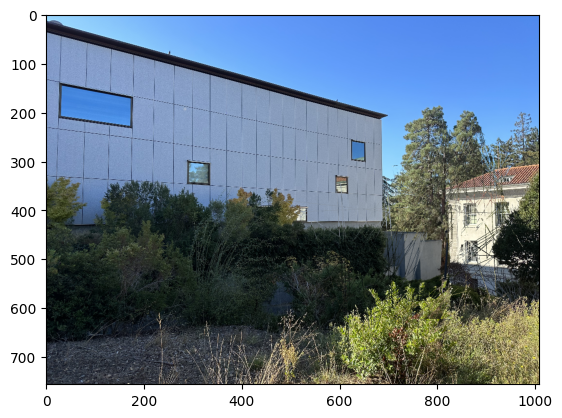

In [224]:
example = cv2.cvtColor(changed_image2, cv2.COLOR_BGR2RGB)
plt.imshow(example)
plt.savefig("./results/mid.jpg")
plt.show()

Test the whole trans processing:

In [299]:
from trans_image import *

h = solve_homograpy(inputs, outputs)
test = trans_img_into_target(image1, image2, mask2, np.linalg.inv(best_H))

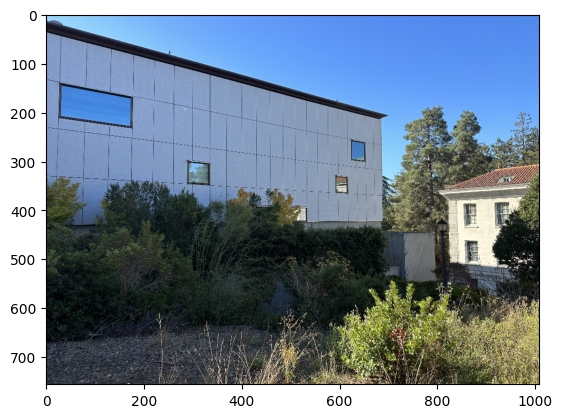

In [300]:
cv2.imwrite("./results/test_wrap.jpg", test)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

In [302]:
np_inputs = np.array(inputs)
np_outputs = np.array(outputs)

s_H = cv2.findHomography(np_inputs, np_outputs)
s_H[0]

array([[ 2.03827065e+00,  4.04003207e-01,  7.27610871e+00],
       [ 2.79184459e-01,  1.84746044e+00, -2.56226641e+02],
       [ 6.46662703e-04,  4.97126719e-04,  1.00000000e+00]])

In [259]:
match_pairs = np.array(match_pairs)
match_pairs.shape

(163, 4)

In [260]:
match_pairs[:5]

array([[927.59521484, 377.8296814 , 869.26397705, 389.95855713],
       [236.96615601, 391.89526367, 509.07827759, 404.54122925],
       [236.96615601, 391.89526367, 509.07827759, 404.54122925],
       [252.23167419, 403.03128052, 521.09643555, 415.30606079],
       [264.86975098, 384.23379517, 532.09954834, 397.23364258]])

In [285]:
from homograph import *

best_H_finder = Homography()
params, best_H = best_H_finder.choose_best_h(match_pairs)

in iter0
less than Min_inlier_num
in iter1
num_of_inlier122 > Min_inlier_num
num_of_inlier122 more than 0, better!
in iter2
num_of_inlier100 > Min_inlier_num
not a better result
in iter3
num_of_inlier114 > Min_inlier_num
not a better result
in iter4
less than Min_inlier_num
in iter5
num_of_inlier95 > Min_inlier_num
not a better result
in iter6
less than Min_inlier_num
in iter7
num_of_inlier91 > Min_inlier_num
not a better result
in iter8
num_of_inlier90 > Min_inlier_num
not a better result
in iter9
num_of_inlier118 > Min_inlier_num
not a better result
in iter10
num_of_inlier87 > Min_inlier_num
not a better result
in iter11
less than Min_inlier_num
in iter12
num_of_inlier124 > Min_inlier_num
num_of_inlier124 more than 122, better!
in iter13
num_of_inlier66 > Min_inlier_num
not a better result
in iter14
less than Min_inlier_num
in iter15
less than Min_inlier_num
in iter16
num_of_inlier122 > Min_inlier_num
not a better result
in iter17
less than Min_inlier_num
in iter18
less than Min_inli

In [286]:
h

array([[-1.01926732e-01, -2.28369553e-01,  2.98093088e+02],
       [-2.97480956e-01,  3.15548186e-02,  3.18911487e+02],
       [-7.07611963e-04, -4.62965543e-04,  1.00000000e+00]])

In [287]:
best_H

array([[ 5.80251633e-01,  7.23561246e-02,  2.94870457e+02],
       [-1.87566441e-01,  8.72275965e-01,  7.07026923e+01],
       [-4.34069716e-04,  3.00531526e-05,  1.00000000e+00]])

In [288]:
chosen_pairs = np.concatenate((params[1], params[3]), axis=0)
best_H_finder.show_best(chosen_pairs, image1, image2, save_path="results/best_H.jpg")

In [289]:
print(f"match pairs: {match_pairs.shape[0]}")
print(f"chosen pairs: {chosen_pairs.shape[0]}")

match pairs: 163
chosen pairs: 137


In [278]:
np_inputs = np.array(inputs)
np_outputs = np.array(outputs)

cv2.findHomography(np_outputs, np_inputs)

(array([[ 1.67397407e+00, -1.23623587e-01, -4.91119668e+02],
        [ 2.92282119e-01,  1.34100305e+00, -1.77472700e+02],
        [ 6.95434741e-04, -1.01859556e-04,  1.00000000e+00]]),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import cv2
import numpy as np
import matplotlib.pyplot as plt

Start with Harris Interest Point Detector (Section 2)

In [2]:
from auto_pts_match import *
image1 = cv2.imread("./../data/2pic/0.JPG")
image1 = cv2.resize(image1, (1008,756))
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.imread("./../data/2pic/1.JPG")
image2 = cv2.resize(image2, (1008,756))
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

h1, coords1 = get_harris_corners(img1)
h2, coords2 = get_harris_corners(img2)

f:\new_gitee_code\berkeley_class\Computer_Vision\project4\code\auto_pts_match.py:21: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  coords = peak_local_max(h, min_distance=1, indices=True)


In [3]:
cv2.imshow("img1",img1)
cv2.waitKey(0)

-1

In [4]:
h1.shape     #(height, width)

(756, 1008)

In [6]:
h1[0][0]

0.9592542316189187

In [7]:
coords1.shape

(2, 18529)

In [8]:
coords2.shape

(2, 18824)

In [9]:
coords1[:,:5] 

array([[364, 340, 473, 339, 472],
       [ 81, 839, 303, 842, 318]], dtype=int64)

In [10]:
coords1[0,:].max()

735

In [11]:
show1 = image1.copy()
show2 = image2.copy()
for i in range(coords1.shape[1]):
    x1, y1 = coords1[0][i], coords1[1][i]
    x2, y2 = coords2[0][i], coords2[1][i]
    
    cv2.circle(show1, (y1, x1), radius=1, color=[0,255,0],
        thickness=2, lineType=cv2.LINE_AA)
    
    cv2.circle(show2, (y1, x1), radius=1, color=[0,255,0],
        thickness=2, lineType=cv2.LINE_AA)
    
cv2.imshow("img1", show1)
cv2.waitKey(0)

-1

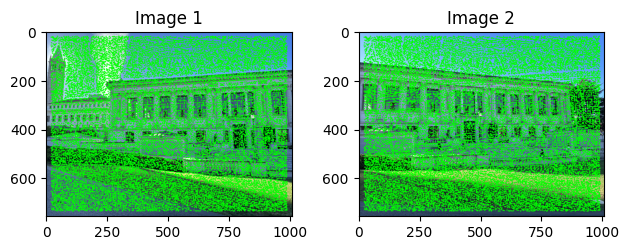

In [12]:
# 创建一个1行2列的图像布局
fig, axes = plt.subplots(1, 2)

plt_image1 = cv2.cvtColor(show1, cv2.COLOR_BGR2RGB)
plt_image2 = cv2.cvtColor(show2, cv2.COLOR_BGR2RGB)

# 在第一个子图中显示图像1
axes[0].imshow(plt_image1)
axes[0].set_title('Image 1')

# 在第二个子图中显示图像2
axes[1].imshow(plt_image2)
axes[1].set_title('Image 2')

# 调整子图间的间距
plt.tight_layout()

# 展示图像
plt.show()

In [13]:
def anms(h, coords, nip = 500, robust = 0.9):
    # Get the intensity of corners
    corners_h = []
    num_of_corners = coords.shape[1]
    for i in range(num_of_corners):
        h_index = coords[0][i]
        w_index = coords[1][i]
        corner_h = h[h_index][w_index]
        corners_h.append(corner_h)
        
    # Get the indices of corners sorted in descending order of corner response
    corners_h = np.array(corners_h)
    idx = np.argsort(-corners_h)
    #print(idx)

    # Initialize the list of selected corner coordinates
    selected_coords = []
    selected_h = []

    # Set the initial suppression radius to infinity
    suppression_radius = np.inf

    # Perform Adaptive Non-Maximal Suppression
    for i in range(num_of_corners):
        current_coord = np.array((coords[0][idx[i]], coords[1][idx[i]]))
        current_h = corners_h[idx[i]]

        # Calculate the minimum suppression radius for the current interest point
        min_radius = np.inf
        
        if(len(selected_coords) == 0):
            selected_coords.append(current_coord)
            selected_h.append(current_h)
            continue

        for j in range(len(selected_coords)):
            dist = np.linalg.norm(current_coord - selected_coords[j])
            if corners_h[idx[i]] < robust * selected_h[j]:
                min_radius = min(min_radius, dist)

        # If the suppression radius of the current interest point is greater than or equal 
        # to the previously retained interest points' suppression radius, add it to the selected corner list
        if min_radius >= robust * suppression_radius:
            selected_coords.append(current_coord)
            selected_h.append(current_h)
            
        # Update the suppression radius
        suppression_radius = min(min_radius, suppression_radius)
        #print(suppression_radius)

        # Stop selection if the desired number of interest points is reached
        if len(selected_coords) >= nip:
            break

    return selected_coords

In [14]:
nip = 500
selected_coords1 = anms(h1, coords1, nip)
selected_coords2 = anms(h2, coords2, nip)

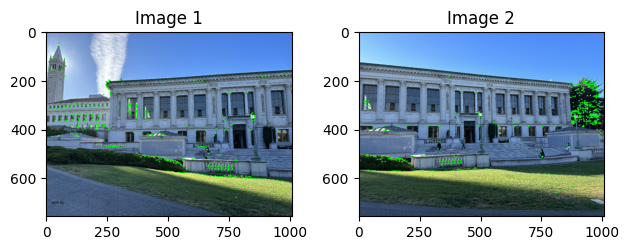

In [15]:
show1 = image1.copy()
show2 = image2.copy()

for i in range(len(selected_coords1)):
    x, y = selected_coords1[i][0], selected_coords1[i][1]
    
    cv2.circle(show1, (y, x), radius=1, color=[0,255,0],
        thickness=2, lineType=cv2.LINE_AA)
    
for i in range(len(selected_coords2)):
    x, y = selected_coords2[i][0], selected_coords2[i][1]
    
    cv2.circle(show2, (y, x), radius=1, color=[0,255,0],
        thickness=2, lineType=cv2.LINE_AA)
    
plt_image1 = cv2.cvtColor(show1, cv2.COLOR_BGR2RGB)
plt_image2 = cv2.cvtColor(show2, cv2.COLOR_BGR2RGB)
    
fig, axes = plt.subplots(1, 2)
axes[0].imshow(plt_image1)
axes[0].set_title('Image 1')
axes[1].imshow(plt_image2)
axes[1].set_title('Image 2')

plt.tight_layout()
plt.show()

Implement Feature Descriptor extraction (Section 4)

In [16]:
def normalize_descriptor(descriptor):
    mean = np.mean(descriptor)
    std = np.std(descriptor)
    normalized_descriptor = (descriptor - mean) / std
    return normalized_descriptor

def haar_wavelet_transform(descriptor):
    # Perform Haar wavelet transform on the descriptor
    # Here, we assume the descriptor is a 2D array of size 8x8
    coeffs = np.zeros_like(descriptor, dtype=np.float32)
    coeffs[:4, :] = descriptor[:4, :] + descriptor[4:, :]
    coeffs[4:, :] = descriptor[:4, :] - descriptor[4:, :]
    return coeffs.flatten()

def extract_descriptor(image, coords, window_size = 40, patch_size = 8, scale = 5):
    descriptors = []
    half_wsize = window_size // 2

    for coord in coords:
        y, x = coord[0], coord[1]
        patch = image[y - half_wsize: y + half_wsize, x - half_wsize: x + half_wsize]  # get the window
        sampled_patch = patch[::scale, ::scale]
        normalized_patch = normalize_descriptor(sampled_patch)  # normalize
        descriptor = normalized_patch.flatten()
        descriptors.append(descriptor)
        
        
    return descriptors

In [17]:
descriptors1 = extract_descriptor(img1, selected_coords1)
descriptors2 = extract_descriptor(img2, selected_coords2)

In [18]:
selected_coords1[:5]

[array([364,  81], dtype=int64),
 array([339, 842], dtype=int64),
 array([472, 318], dtype=int64),
 array([331, 405], dtype=int64),
 array([522, 599], dtype=int64)]

In [19]:
print(len(descriptors1))
for i in range(len(descriptors1)):
    assert(len(descriptors1[i]) == 64)
    assert(len(descriptors2[i]) == 64)


500


Implement Feature Matching (Section 5)

In [31]:
def feature_match(desc1, desc2, coords1, coords2, threshold = 0.72):
    
    match_pairs = []
    
    for i in range(len(desc1)):
        pt1 = coords1[i]
        dc1 = desc1[i]
        
        distance = np.linalg.norm(dc1 - desc2, axis=1)
        idx = np.argsort(distance)
        best_index = idx[0]
        next_index = idx[1]
        best_dis = distance[best_index]
        next_dis = distance[next_index]
        
        rate = best_dis / next_dis
        print(rate)
        if (rate < threshold):
            pt2 = coords2[best_index]
            match_pair = [pt1[1],pt1[0],pt2[1],pt2[0]]
            match_pairs.append(match_pair)
            
    return match_pairs
         
        

In [32]:
match_pairs = feature_match(descriptors1, descriptors2, selected_coords1, selected_coords2)

0.9035981795850284
0.9010402037414322
0.9918704633570087
0.8636363766757745
0.9740720115725497
0.8789504443820024
0.9570042007763998
0.9959697436988336
0.988050813894006
0.9939792619669725
0.9595144951066771
0.9865943793472564
0.965713177937497
0.9929301053031252
0.9937639622473514
0.9538331504608792
0.9639683416385224
0.9991048545063437
0.9585305822779648
0.9799701307656714
0.8852165310857696
0.9799108294388706
0.980407615365364
0.9675891957059567
0.9745308531466044
0.9625661226514381
0.9738127406888537
0.9998852316000206
0.9624763469642127
0.9690556214947142
0.977074242804179
0.9867465088052096
0.9764580994588508
0.9855582858595139
0.9439124834282827
0.9511931943904248
0.9038810849717798
0.933482103169257
0.9647522062986232
0.9974205974196697
0.9613812185751349
0.9613289421515865
0.8695999403302228
0.7480576122135916
0.9576896656542341
0.9554196999596885
0.9700893558515689
0.9681127494716685
0.993631737504592
0.9823820671548182
0.965159556581641
0.9856812212463527
0.9962990680917446


In [33]:
len(match_pairs)

10

In [34]:
image = np.hstack((image1, image2))

height, width, _ = image1.shape

for pair in match_pairs:
    x1,y1 = pair[0], pair[1]
    x2,y2 = pair[2], pair[3]
            
    # same as situation in get_points
    # we concat two images in width
    # so x2 in image should be x2 in image2 + width
            
    x2 += width
            
    x1,y1,x2,y2 = round(x1),round(y1),round(x2),round(y2)
    x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
            
    cv2.circle(image, (x1, y1), radius=3, color=[255,0,0],
                thickness=2, lineType=cv2.LINE_AA)

    cv2.circle(image, (x2, y2), radius=3, color=[255,0,0],
                thickness=2, lineType=cv2.LINE_AA)

    cv2.line(image, (x1, y1), (x2, y2), color=[255,255,0],
                thickness=1)
    
#cv2.imshow("matched", image)
#cv2.waitKey(0)
cv2.imwrite("./../mid_result/match.jpg", image)

True

In [35]:
np.save("./../data/pairs.npy", match_pairs)